Olá Bernardo. Sou Anilton e vou avaliar seu projeto. 


Vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do Tutor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do Tutor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do Tutor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>



Parabéns pelo Projeto! Abaixo meus comentários com o intuito de melhorar o projeto.


Itens nice-to-have:
<div class="alert alert-block alert-warning">
<b>Comentário do Tutor: </b> <a class="tocSkip"></a>

- Veja que existem quantidades negativas tem um significado. Significa uma ordem cancelada. Ou seja, um cliente comprou 10 pacotes de sabão. Logo, vai ter uma linha com quantidade 10. Se ele cancelar essa compra, vai se adicionar uma nova linha com -10. Logo, o saldo desse cliente ficaria como 0.  
- Sua EDA está bem interessante com gráficos legais, mas existe margem para aprofundar. 
 
- Seu dashboard está muito simples. Deveria apresentar informações sobre a segmentação que você fez.
- A apresentação também não está ideal. Não é bom colocar print com código e dados não formatados.
- Sua revisão bibliográfica deveria conter informações suficientes para que um leitor encontre o artigo/blog/site...
- Poderia ter explorado os resultados da segmentação.

</div>


Link da Apresentação: https://drive.google.com/drive/folders/1GLUZqAntarSqjpmbh4kwJbjTuXot81Gu?usp=sharing

Link para Dashboard: https://public.tableau.com/app/profile/bernardo.almeida.paulo/viz/ProjetoFinal_17305992649130/Planilha1?publish=yes

# PROJETO FINAL - E-Commerce 

## Identificar os perfis dos consumidores

###### Objetivo do Projeto
Intenção Principal: Segmentar os consumidores com base em seu comportamento de compra, usando as informações disponíveis no dataset.
Objetivo: Criar perfis de clientes para identificar padrões de compra e tipos de consumidores no e-commerce.
- Por que? A análise de perfis ajuda a entender melhor o comportamento dos clientes, personalizar estratégias de marketing e melhorar a retenção de clientes, mesmo com dados limitados.

### Análise exploratória dos dados

In [1]:
#importar dados
import pandas as pd
from pathlib import Path 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from datetime import timedelta

In [2]:
#carregar dados
ecommerce_us = pd.read_csv("/datasets/ecommerce_dataset_us.csv", sep="\t")

In [3]:
#imprimir exemplar e informações dos dados
print(ecommerce_us.head())
print(ecommerce_us.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Descriptio

In [4]:
#mudar os tipos de dados e transformar para letra minusculas.

#letras miníusculas
ecommerce_us.columns = ecommerce_us.columns.str.lower()

#converter colunas para o formato correto
ecommerce_us['invoicedate'] = pd.to_datetime(ecommerce_us['invoicedate'], errors='coerce')
ecommerce_us = ecommerce_us.dropna(subset=['invoicedate'])

#converter a coluna 'customerid' para inteiro, preenchendo valores ausentes com um valor neutro, como -1
ecommerce_us['customerid'] = ecommerce_us['customerid'].fillna(-1).astype(int)

#colocar o texto da coluna 'description' em letras minúsculas
ecommerce_us['description'] = ecommerce_us['description'].str.lower()

print(ecommerce_us.head())

  invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          invoicedate  unitprice  customerid  
0 2018-11-29 08:26:00       2.55       17850  
1 2018-11-29 08:26:00       3.39       17850  
2 2018-11-29 08:26:00       2.75       17850  
3 2018-11-29 08:26:00       3.39       17850  
4 2018-11-29 08:26:00       3.39       17850  


In [5]:
#valores ausentes em 'Description'

#Substituir valores ausentes por 'no description'
ecommerce_us['description'] = ecommerce_us['description'].fillna('no description')

print("Informações do Dataset:")
print(ecommerce_us.info())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  541909 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   541909 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 33.1+ MB
None


###### Coleta e Limpeza dos Dados
- Foi realizada a verificação dos dados, e foi constatada a presença de informações incorretas, o que poderia dificultar a análise. Assim, os dados foram transformados em letras minúsculas, convertidos para o formato correto, e os valores ausentes foram preenchidos.

### Tarefa

In [6]:
# 1. Análise Geral
print("\nEstatísticas Descritivas:")
print(ecommerce_us.describe())


Estatísticas Descritivas:
            quantity      unitprice     customerid
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114   11476.725404
std       218.081158      96.759853    6778.330409
min    -80995.000000  -11062.060000      -1.000000
25%         1.000000       1.250000   12352.000000
50%         3.000000       2.080000   14382.000000
75%        10.000000       4.130000   16255.000000
max     80995.000000   38970.000000   18287.000000


- describe() fornecem uma visão geral das características dos dados, incluindo contagem de valores, média, desvio padrão, valores mínimos e máximos.

In [7]:
#configurar estilo de visualização
sns.set(style="whitegrid")

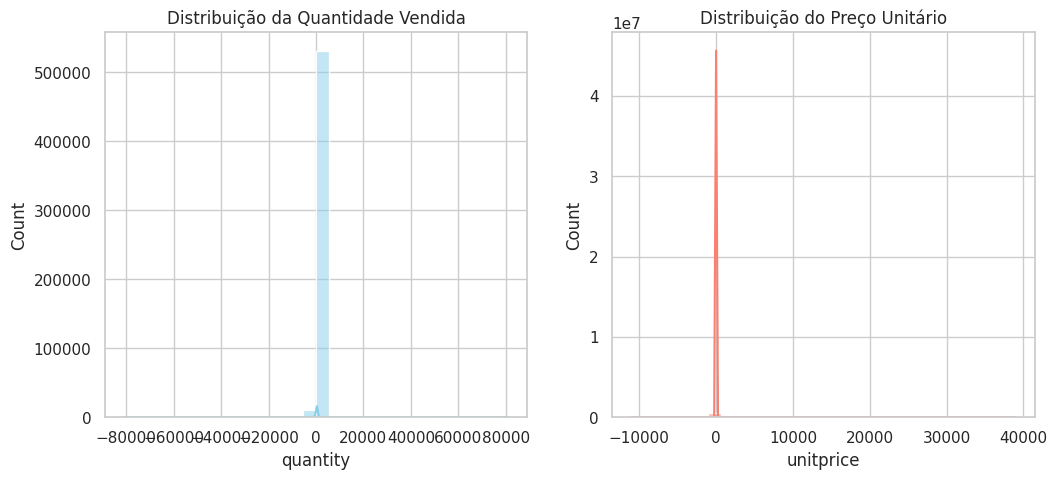

In [8]:
# 2. Distribuições de Variáveis Numéricas
# Histograma para quantidade e preço unitário
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(ecommerce_us['quantity'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição da Quantidade Vendida')

plt.subplot(1, 2, 2)
sns.histplot(ecommerce_us['unitprice'], bins=30, kde=True, color='salmon')
plt.title('Distribuição do Preço Unitário')

plt.show()

- Os histogramas de quantity e unitprice mostram a dispersão das quantidades vendidas e dos preços unitários, o que ajuda a identificar valores extremos.

In [9]:
#Após a identificação de Outliers, optamos por filtrar os dados

#calcular os quartis e o IQR para a coluna quantity
Q1_quantity = ecommerce_us['quantity'].quantile(0.25)
Q3_quantity = ecommerce_us['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

#calcular os limites inferiores e superiores para quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

#calcular os quartis e o IQR para a coluna unitprice
Q1_unitprice = ecommerce_us['unitprice'].quantile(0.25)
Q3_unitprice = ecommerce_us['unitprice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

#calcular os limites inferiores e superiores para unitprice
lower_bound_unitprice = max(0, Q1_unitprice - 1.5 * IQR_unitprice)  # Limite mínimo não pode ser negativo
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

#filtrar os dados e sobrescrever o DataFrame original ecommerce_us
ecommerce_us = ecommerce_us[
    (ecommerce_us['quantity'] >= lower_bound_quantity) &
    (ecommerce_us['quantity'] <= upper_bound_quantity) &
    (ecommerce_us['unitprice'] >= lower_bound_unitprice) &
    (ecommerce_us['unitprice'] <= upper_bound_unitprice)
]

print("Dados após remoção de outliers:", ecommerce_us.shape[0], "linhas")
print(ecommerce_us.head())

Dados após remoção de outliers: 444108 linhas
  invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          invoicedate  unitprice  customerid  
0 2018-11-29 08:26:00       2.55       17850  
1 2018-11-29 08:26:00       3.39       17850  
2 2018-11-29 08:26:00       2.75       17850  
3 2018-11-29 08:26:00       3.39       17850  
4 2018-11-29 08:26:00       3.39       17850  


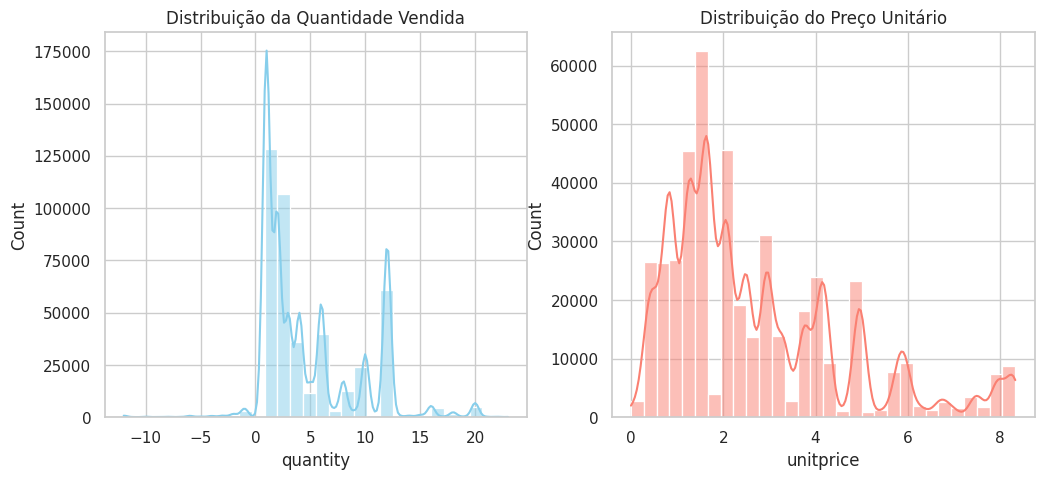

In [10]:
#verificar a Remoção de Outliers

#histograma para quantidade e preço unitário
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(ecommerce_us['quantity'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição da Quantidade Vendida')

plt.subplot(1, 2, 2)
sns.histplot(ecommerce_us['unitprice'], bins=30, kde=True, color='salmon')
plt.title('Distribuição do Preço Unitário')

plt.show()

- Foi identificado a presença de valores extremos(outliers), logo, realizamos a filtragem desses dados.

In [11]:
#verificação de números negativos
negative_quantity = ecommerce_us[ecommerce_us['quantity'] < 0]
print(negative_quantity.head())
print("Número de registros com quantidade negativa:", negative_quantity.shape[0])

    invoiceno stockcode                       description  quantity  \
154   C536383    35004C   set of 3 coloured  flying ducks        -1   
235   C536391     22556    plasters in tin circus parade        -12   
239   C536391     21484       chick grey hot water bottle       -12   
240   C536391     22557  plasters in tin vintage paisley        -12   
939   C536506     22960          jam making set with jars        -6   

            invoicedate  unitprice  customerid  
154 2018-11-29 09:49:00       4.65       15311  
235 2018-11-29 10:24:00       1.65       17548  
239 2018-11-29 10:24:00       3.45       17548  
240 2018-11-29 10:24:00       1.65       17548  
939 2018-11-29 12:38:00       4.25       17897  
Número de registros com quantidade negativa: 7035


In [12]:
#filtrand apenas numeros positivos
returns = ecommerce_us[ecommerce_us['quantity'] < 0]
ecommerce_us = ecommerce_us[ecommerce_us['quantity'] >= 0]
print("Dados sem devoluções:", ecommerce_us.shape[0], "linhas")

Dados sem devoluções: 437073 linhas


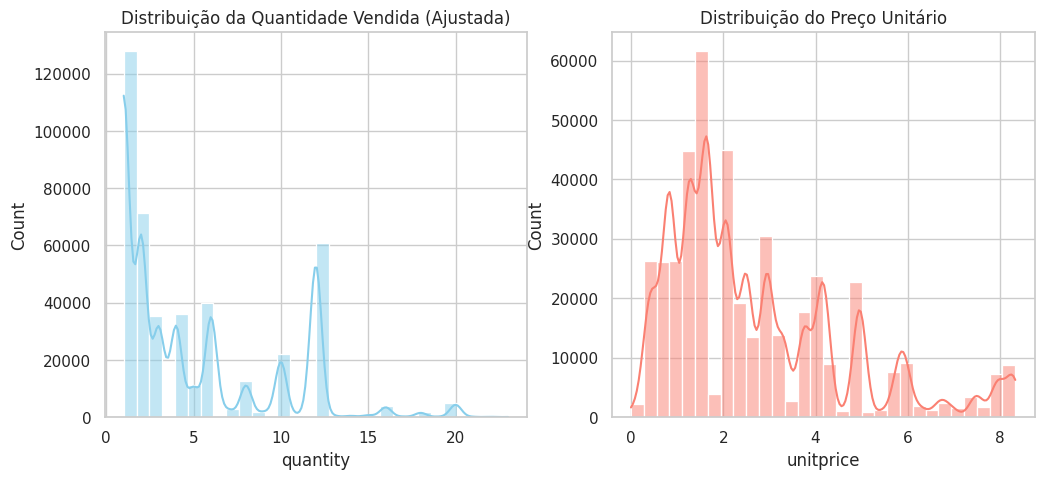

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(ecommerce_us['quantity'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição da Quantidade Vendida (Ajustada)')

plt.subplot(1, 2, 2)
sns.histplot(ecommerce_us['unitprice'], bins=30, kde=True, color='salmon')
plt.title('Distribuição do Preço Unitário')

plt.show()

- Identificamos mesmo após a filtragem do Outliers a presença de valores negativos. Em muitos conjuntos de dados de transações, valores negativos na quantidade indicam devoluções de produtos. Mas acredito que não foi o que acontceu por aqui, logo, realizamos a remoção desses valores negativos.

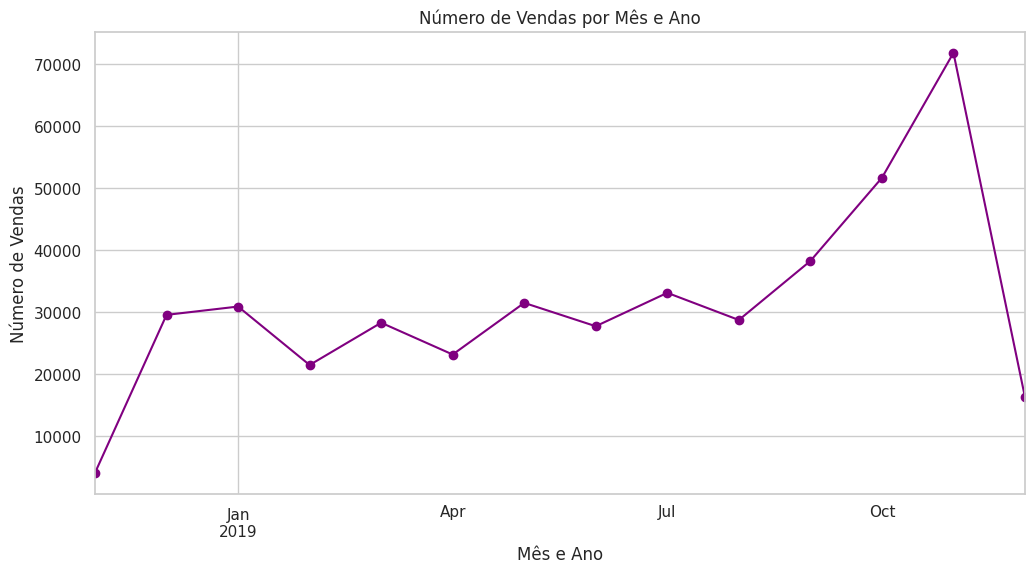

In [14]:
# 3. Análise de Datas
#converter para mês e ano para verificar sazonalidade
ecommerce_us['month_year'] = ecommerce_us['invoicedate'].dt.to_period('M')

#número de vendas por mês e ano
monthly_sales = ecommerce_us.groupby('month_year').size()

#vendas mensais
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Número de Vendas por Mês e Ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Número de Vendas')
plt.show()

Análise Temporal (Datas):

- A análise de vendas por month_year fornece uma ideia da sazonalidade e do comportamento temporal das vendas. Observa-se que, de janeiro a agosto, há uma baixa sazonalidade no número de compras, enquanto de setembro a novembro essa sazonalidade é crescente, com uma queda acentuada em dezembro.

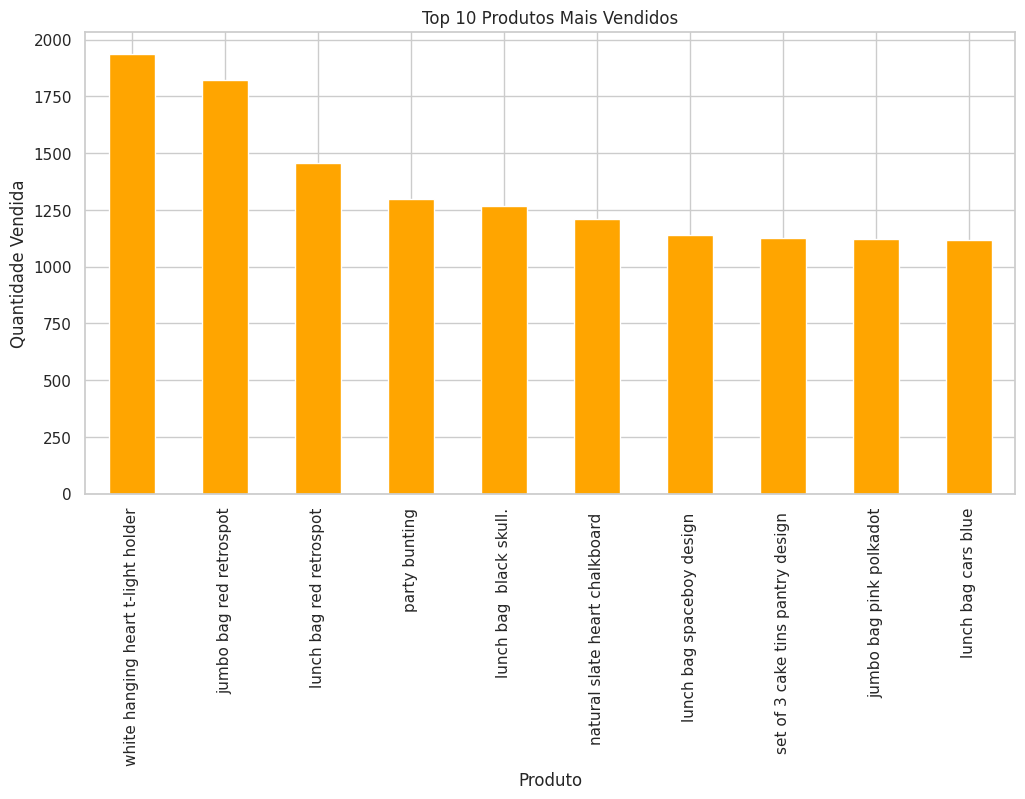

In [15]:
# 4. Análise de Produtos

#produtos mais vendidos
top_products = ecommerce_us['description'].value_counts().head(10)

#gráfico de barras dos produtos mais vendidos
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

Produtos Mais Vendidos:

- Os produtos mais vendidos (top 10) são exibidos em um gráfico de barras, o que ajuda a identificar os itens mais populares. Podemos concluir que o produto mais vendido é 'White hanging heart t-light holder'.

Total de Clientes Únicos: 4167


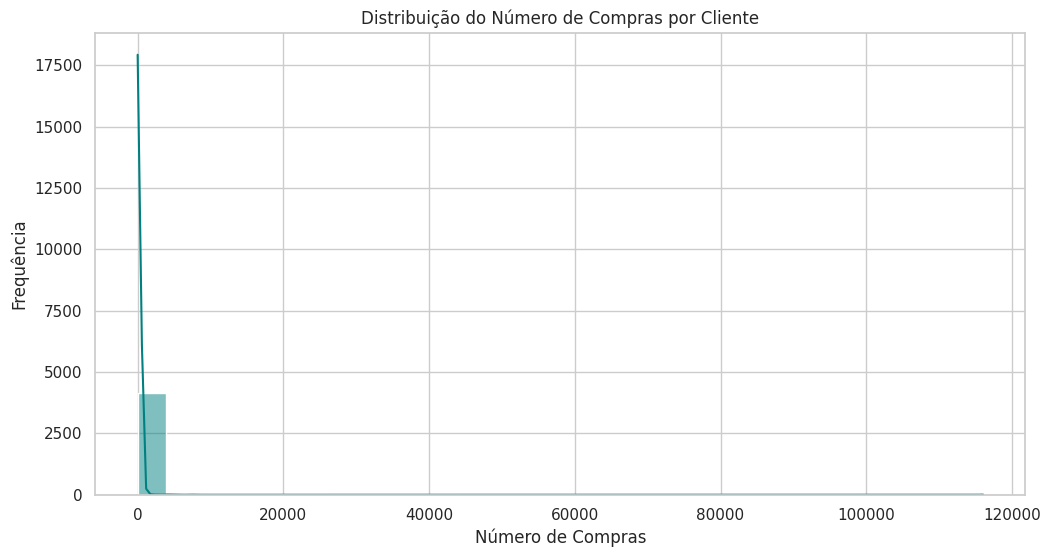

In [16]:
# 5. Análise de Clientes

#contagem de clientes únicos
unique_customers = ecommerce_us['customerid'].nunique()
print(f"Total de Clientes Únicos: {unique_customers}")

#distribuição de compras por cliente
customer_purchase_counts = ecommerce_us['customerid'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(customer_purchase_counts, bins=30, kde=True, color='teal')
plt.title('Distribuição do Número de Compras por Cliente')
plt.xlabel('Número de Compras')
plt.ylabel('Frequência')
plt.show()

Análise de Clientes:

- Contamos o número de clientes únicos e examinamos a distribuição de compras por cliente. Isso pode indicar o nível de fidelidade ou de compra única dos clientes.

Essas análises podem fornecer insights sobre:
- Sazonalidade nas vendas (picos em certos meses).
- Produtos que mais contribuem para a receita.
- Comportamento do cliente em termos de compras frequentes ou compras únicas.

Esses insights são a base para ações de marketing, estratégias de estoque e políticas de fidelização de clientes.

In [17]:
#Segmetação dos usuários com base no historico de compras

#definir categorias de produtos com base em palavras-chave
def categorize_product(description):
    description = description.lower()
    if 'light' in description or 'lantern' in description:
        return 'decoration'
    elif 'heart' in description or 'gift' in description:
        return 'gift'
    elif 'cup' in description or 'bottle' in description:
        return 'kitchenware'
    elif 'bag' in description or 'holder' in description:
        return 'accessory'
    elif 'candle' in description or 'wool' in description:
        return 'home'
    else:
        return 'other'

#aplicar a função para criar uma coluna de categoria
ecommerce_us['category'] = ecommerce_us['description'].apply(categorize_product)

In [18]:
#quantidade de produtos comprados por cada cliente em cada categoria
category_pivot = ecommerce_us.pivot_table(
    index='customerid', 
    columns='category', 
    values='quantity', 
    aggfunc='sum', 
    fill_value=0
)

print(category_pivot.head())

category    accessory  decoration   gift  home  kitchenware   other
customerid                                                         
-1              42126       16643  25535  6380        12756  190168
 12347            142         114     94    16           48     867
 12348              0           0      0     0            0      20
 12349             14          26     71     0           12     350
 12350              0           0      0     0            0     172


In [19]:
#padronizar os dados
scaler = StandardScaler()
category_pivot_scaled = scaler.fit_transform(category_pivot)

#K-means
kmeans = KMeans(n_clusters=4, random_state=42)
category_pivot['cluster'] = kmeans.fit_predict(category_pivot_scaled)

print(category_pivot.groupby('cluster').mean())

category     accessory    decoration          gift         home   kitchenware  \
cluster                                                                         
0            30.496027     19.153807     29.059728     6.322225     10.783389   
1         42126.000000  16643.000000  25535.000000  6380.000000  12756.000000   
2           523.750958    114.049808    157.344828    27.398467     85.145594   
3          1749.750000   1170.750000   1809.500000   434.500000    723.750000   

category          other  
cluster                  
0            212.784927  
1         190168.000000  
2           1325.823755  
3          13441.250000  


Após a segmentação, os clusters revelam grupos de clientes com diferentes perfis de compra.

- Clientes de Decoração: Clientes que compram muitos itens de decoração, como lanternas e luzes.
- Clientes de Presentes: Clientes que se concentram em comprar itens de presente, como produtos com temas de coração ou presentes de datas comemorativas.
- Clientes de Acessórios: Usuários que compram acessórios, como bolsas ou suportes.
- Outros: Clientes sem um padrão específico de compras, podendo ser exploradores ou compradores pontuais.

Essa segmentação permite uma personalização nas campanhas de marketing e ofertas mais direcionadas, o que ajuda a aumentar a retenção e fidelidade dos clientes.

Sugestão de Implementação de Ofertas Baseadas na Segmentação

- Clientes de Decoração: Ofereça descontos em itens de decoração ou promoções de compras combinadas para incentivar compras adicionais.
- Clientes de Presentes: Envie ofertas em datas comemorativas ou sugestões de presentes relacionados.
- Clientes de Acessórios: Ofereça pacotes de produtos ou acessórios complementares.
- Outros: Envie uma pesquisa de interesse para entender melhor as preferências e engajá-los em novas categorias.

###### Calcular métrica RFM

In [26]:
#determinar a data de referência para o cálculo de Recency
current_date = ecommerce_us['invoicedate'].max()

#criar a métrica RFM
rfm = ecommerce_us.groupby('customerid').agg({
    'invoicedate': lambda x: (current_date - x.max()).days,  # Recency
    'invoiceno': 'nunique',  # Frequency
    'quantity': 'sum'  # Monetary (use uma coluna que represente o gasto total se disponível)
}).reset_index()

#renomear as colunas
rfm.columns = ['customerid', 'recency', 'frequency', 'monetary']

#certificar-se de que valores monetários negativos são tratados
rfm['monetary'] = rfm['monetary'].clip(lower=0)

print(rfm.head())

   customerid  recency  frequency  monetary
0          -1        0       1870    293608
1       12347        1          7      1281
2       12348      248          1        20
3       12349       18          1       473
4       12350      309          1       172


In [36]:
#definir intervalos fixos para as métricas
rfm['R_Score'] = pd.cut(rfm['recency'], bins=4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.cut(rfm['frequency'], bins=4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.cut(rfm['monetary'], bins=4, labels=[1, 2, 3, 4])

#criar coluna combinada RFM
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [37]:
def assign_segment(rfm):
    if rfm['RFM_Score'] >= 10:
        return 'Champions'
    elif rfm['RFM_Score'] >= 8:
        return 'Loyal Customers'
    elif rfm['R_Score'] == 4:
        return 'Potential Loyalists'
    elif rfm['R_Score'] == 1 and rfm['F_Score'] == 1:
        return 'Dormant'
    elif rfm['F_Score'] >= 3:
        return 'Frequent Buyers'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(assign_segment, axis=1)
print(rfm.groupby('Segment').agg({
    'customerid': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index())

               Segment  customerid     recency    frequency       monetary
0            Champions           1    0.000000  1870.000000  293608.000000
1              Dormant         334  326.721557     1.317365     113.628743
2               Others        1035  179.862802     1.916908     183.590338
3  Potential Loyalists        2797   31.614230     5.045406     584.964605


Os segmentos podem ser interpretados da seguinte forma:

- Champions: Clientes mais valiosos e engajados.
- Loyal Customers: Clientes frequentes e fiéis.
- Potential Loyalists: Compraram recentemente, mas com menor frequência.
- Dormant: Clientes inativos que precisam de reativação.
- Frequent Buyers: Compram frequentemente, mas não gastam muito.

### Teste de Hipóteses Estatísticas
###### Hipótese 1 - Clientes de Decoração gastam mais, em média, do que clientes de outros segmentos.

In [21]:
#Hipótese 1

#gasto total por cliente
ecommerce_us['total_spent'] = ecommerce_us['quantity'] * ecommerce_us['unitprice']

#definir os grupos com base na categoria
decor_customers = ecommerce_us[ecommerce_us['category'] == 'decoration'].groupby('customerid')['total_spent'].sum()
other_customers = ecommerce_us[ecommerce_us['category'] != 'decoration'].groupby('customerid')['total_spent'].sum()

#realizar o teste t
t_stat, p_value = ttest_ind(decor_customers, other_customers, alternative='greater')

if p_value < 0.05:
    print(f"Rejeitamos a hipótese nula. Clientes de decoração gastam, em média, mais do que os demais. (P-valor: {p_value:.4f})")
else:
    print(f"Não temos evidências suficientes para afirmar que clientes de decoração gastam mais do que os demais. (P-valor: {p_value:.4f})")

Não temos evidências suficientes para afirmar que clientes de decoração gastam mais do que os demais. (P-valor: 1.0000)


- O p-valor de 1.0000 é bastante alto, o que sugere que as médias de gasto entre os dois grupos (clientes de decoração e outros clientes) são extremamente semelhantes.

###### Hipótese 2 - Clientes com frequência de compras maior tem um gasto médio mais elevado.

In [22]:
#número de compras por cliente
purchase_counts = ecommerce_us.groupby('customerid').size()

#dividir os clientes em "frequentes" e "não frequentes" com base na mediana de compras
frequent_customers = purchase_counts[purchase_counts > purchase_counts.median()].index
non_frequent_customers = purchase_counts[purchase_counts <= purchase_counts.median()].index

#gasto médio de cada grupo
#calcular o total gasto por cliente
spending_per_customer = ecommerce_us.groupby('customerid')['total_spent'].sum()

#extrair o gasto médio dos grupos
frequent_spending = spending_per_customer[frequent_customers]
non_frequent_spending = spending_per_customer[non_frequent_customers]

t_stat, p_value = ttest_ind(frequent_spending, non_frequent_spending, alternative='greater')

if p_value < 0.05:
    print(f"Rejeitamos a hipótese nula. Clientes frequentes gastam, em média, mais do que os não frequentes. (P-valor: {p_value:.4f})")
else:
    print(f"Não temos evidências suficientes para afirmar que clientes frequentes gastam mais do que os não frequentes. (P-valor: {p_value:.4f})")

Rejeitamos a hipótese nula. Clientes frequentes gastam, em média, mais do que os não frequentes. (P-valor: 0.0000)


Esse achado sugere uma forte relação entre a frequência de compra e o valor médio gasto.

###### Possíveis razões para o resultado

Compradores Frequentes como Clientes Fiéis:
- Clientes que compram frequentemente podem estar mais engajados com a loja, seja por satisfação com o produto, proximidade com a marca ou maior relevância dos produtos oferecidos para suas necessidades. Esses clientes fiéis tendem a gastar mais ao longo do tempo.

Perfil de Compra e Comportamento de Consumo:
- Clientes frequentes podem ser atraídos por campanhas promocionais, novos lançamentos ou descontos sazonais, o que os incentiva a fazer compras adicionais. Esse comportamento de consumo impulsiona o gasto médio ao longo do tempo.


###### Solução sugerida
Este resultado é útil para estratégias de retenção e personalização de ofertas. Para maximizar o valor desse segmento, você pode:

- Fidelizar Clientes Frequentes com programas de recompensas ou vantagens exclusivas para mantê-los engajados.
- Aumentar o Ticket Médio promovendo produtos complementares ou oferecendo descontos em pacotes, incentivando esses clientes a explorar mais do catálogo.
- Campanhas Direcionadas para clientes menos frequentes, incentivando-os a comprar com mais regularidade, o que pode aumentar seu valor ao longo do tempo.

## Fontes (Artigos, Blogs, ...)

Sysvision Global: O artigo explora o uso da segmentação de dados no Power BI, destacando como a ferramenta permite criar filtros interativos que ajustam visualizações em tempo real. A segmentação facilita a análise por período, categoria ou desempenho regional, ajudando empresas a identificar tendências e tomar decisões mais embasadas. Além disso, o texto menciona tendências futuras, como automação e inteligência artificial, para análises mais sofisticadas de dados

SciELO: Este leva a uma publicação científica sobre segmentação de mercado, discutindo métodos de análise e sua aplicação prática. O foco está em como a segmentação pode melhorar o direcionamento de estratégias empresariais, utilizando dados para personalizar ofertas e entender melhor os diferentes perfis de consumidores, ampliando a eficiência do marketing e vendas.

PH3A: O blog apresenta a segmentação de dados como uma estratégia para identificar prospects com maior poder de consumo. A abordagem ajuda empresas a entender comportamentos específicos dos consumidores, utilizando dados para ajustar campanhas e otimizar conversões, com exemplos de aplicação no mercado brasileiro.

InboundCycle: A segmentação de dados é discutida como uma ferramenta essencial para estratégias de marketing digital. O artigo destaca a importância de personalizar campanhas com base em dados de clientes, abordando aspectos como comportamento, preferências e hábitos de compra, com o objetivo de aumentar a retenção e a fidelização.

KnowSolution: Focado na aplicação prática da segmentação no Power BI, este texto detalha o processo de criação de dashboards e segmentadores. Ele enfatiza como essas ferramentas ajudam a ajustar análises com base em categorias, períodos ou produtos específicos, otimizando a apresentação e a tomada de decisões baseadas em dados.

ICMC Júnior: Este blog fala sobre a importância da análise exploratória de dados para compreender padrões e tendências. A segmentação é abordada como uma técnica que "tortura os dados até confessarem", permitindo insights mais profundos e sustentados para embasar decisões estratégicas.